In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

import os
%config IPCompleter.greedy=True

In [2]:
os.chdir('D:\AIMLData\GL_Hackathon')


fd_train = pd.read_csv('frequency_domain_features_train.csv')
fd_test = pd.read_csv('frequency_domain_features_test.csv')
td_train = pd.read_csv('time_domain_features_train.csv')
td_test = pd.read_csv('time_domain_features_test.csv')
hr_train = pd.read_csv('heart_rate_non_linear_features_train.csv')
hr_test = pd.read_csv('heart_rate_non_linear_features_test.csv')

In [43]:
df3 = pd.merge(fd_train, td_train, how='outer', on='uuid')
df_train = pd.merge(df3, hr_train, how='outer', on='uuid')

df2 = pd.merge(fd_test, td_test, how='outer', on='uuid')
df_test = pd.merge(df2, hr_test, how='outer', on='uuid')

In [44]:
df_train.condition.value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [5]:


# df_train_ns = df_train.query('condition == "no stress"')
# df_train_in = df_train.query('condition == "interruption"')
# df_train_tp = df_train.query('condition == "time pressure"')

In [6]:
# from sklearn.utils import resample

# df_train_tp_upsampled = resample(df_train_tp, n_samples = 200082, random_state=100)
# df_train_in_upsampled = resample(df_train_in, n_samples = 200082, random_state=100)

In [7]:
# df_train = pd.concat([df_train_ns, df_train_tp_upsampled, df_train_in_upsampled])

In [45]:
df_train.condition.value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [9]:
# df_train_ns.shape, df_train_in.shape, df_train_tp.shape

In [46]:
df_train['MEAN_RR'] = df_train['MEAN_RR']/1000

In [47]:
df_train['MEAN_RR'] = 60 / df_train['MEAN_RR']

In [48]:
df_train['MEAN_RR']

0         67.784520
1         63.868831
2         66.801305
3         68.045892
4         74.108353
            ...    
369284    83.171967
369285    60.959100
369286    58.508060
369287    75.176367
369288    73.671255
Name: MEAN_RR, Length: 369289, dtype: float64

In [49]:
df_train['MEDIAN_RR'] = 60 * 1000 / df_train['MEDIAN_RR'] 

In [50]:
df_test['MEAN_RR'] = 60 * 1000 / df_test['MEAN_RR'] 
df_test['MEDIAN_RR'] = 60 * 1000 / df_test['MEDIAN_RR'] 

In [51]:
df_train['MEDIAN_RR']

0         70.277054
1         63.267256
2         66.151650
3         67.154655
4         73.965877
            ...    
369284    83.156169
369285    61.310641
369286    58.538390
369287    74.667765
369288    73.603485
Name: MEDIAN_RR, Length: 369289, dtype: float64

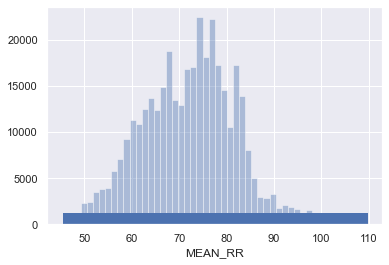

In [33]:
sns.distplot(df_train['MEAN_RR'], kde=False, rug=True)

In [52]:
y_train = df_train.pop('HR')
X_train = df_train.copy(deep = True)
X_test = df_test.copy(deep = True)

In [53]:
X_train.drop(columns= ['datasetId'], inplace=True)
X_test.drop(columns= ['datasetId'], inplace=True)
X_train.drop(columns= ['uuid'], inplace=True)
y_id = X_test.pop('uuid')
X_train.drop(columns= ['SKEW_REL_RR','KURT_REL_RR'], inplace=True)
X_test.drop(columns= ['SKEW_REL_RR','KURT_REL_RR'], inplace=True)
X_train.drop(columns= ['SDSD_REL_RR'], inplace=True) 
X_test.drop(columns= ['SDSD_REL_RR'], inplace=True) 

In [97]:
X_train.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'SD1', 'SD2', 'sampen', 'higuci', 'condition'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
X_train['condition'] = lEncoder.fit_transform(X_train['condition'])
X_test['condition'] = lEncoder.fit_transform(X_test['condition'])


In [37]:
X_train.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,SD1,SD2,sampen,higuci,condition
0,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,...,-0.000203,-0.000179,0.017080,0.007969,2.143342,11.001565,199.061782,2.139754,1.163485,1
1,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,...,-0.000059,0.000611,0.013978,0.004769,2.930855,9.170129,114.634458,2.174499,1.084711,0
2,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,...,-0.000011,-0.000263,0.018539,0.008716,2.127053,11.533417,118.939253,2.135350,1.176315,0
3,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,...,0.000112,0.000494,0.017761,0.008660,2.050988,11.119476,127.318597,2.178341,1.179688,1
4,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,...,-0.000100,-0.002736,0.023715,0.013055,1.816544,13.590641,87.718281,2.221121,1.249612,1


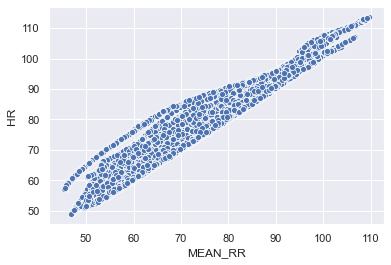

In [55]:
sns.scatterplot(x = X_train['MEAN_RR'], y = y_train)

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
y_test_predict

array([64.64193723, 74.14351532, 69.10624728, ..., 60.95079273,
       77.3618022 , 77.34983413])

In [8]:
X_train['LF_HF'].describe()

count    369289.000000
mean        115.977200
std         360.855129
min           2.319952
25%          14.737458
50%          28.789747
75%          80.429614
max        7796.443096
Name: LF_HF, dtype: float64

In [39]:
X_train['SDRR'] = ((X_train['SDRR'] > 141-39) & (X_train['SDRR'] < 141+39))

In [41]:
X_train['RMSSD'] = ((X_train['RMSSD'] > 27-12) & (X_train['RMSSD'] < 27+12))

In [23]:
X_train['pNN50_Normal'] = ((X_train['pNN50'] > 0.20-0.16) & (X_train['pNN50'] < 0.20+0.16))

In [52]:
X_train['TP'] = ((X_train['TP'] > 3466-1018) & (X_train['TP'] < 3466+1018))

In [62]:
X_train['VLF'] = ((X_train['VLF'] > 627-215) & (X_train['VLF'] < 627+215))
X_train['LF'] = ((X_train['LF'] > 1170-416) & (X_train['LF'] < 1170+416))

In [66]:
X_train['HF'] = ((X_train['HF'] > 975-203) & (X_train['HF'] < 975+203))

In [70]:
X_train['LF_HF'] = ((X_train['LF_HF'] > 150) & (X_train['LF_HF'] < 200))

In [44]:
X_test['SDRR'] = ((X_test['SDRR'] > 141-39) & (X_test['SDRR'] < 141+39))
X_test['RMSSD'] = ((X_test['RMSSD'] > 27-12) & (X_test['RMSSD'] < 27+12))
X_test['pNN50'] = ((X_test['pNN50'] > 0.20-0.16) & (X_test['pNN50'] < 0.20+0.16))

In [53]:
X_test['TP'] = ((X_test['TP'] > 3466-1018) & (X_test['TP'] < 3466+1018))

In [63]:
X_test['VLF'] = ((X_test['VLF'] > 627-215) & (X_test['VLF'] < 627+215))
X_test['LF'] = ((X_test['LF'] > 1170-416) & (X_test['LF'] < 1170+416))

In [67]:
X_test['HF'] = ((X_test['HF'] > 975-203) & (X_test['HF'] < 975+203))

In [71]:
X_test['LF_HF'] = ((X_test['LF_HF'] > 150) & (X_test['LF_HF'] < 200))

In [61]:
X_train.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,SD1,SD2,sampen,higuci,condition
117514,4899.596270,88.547189,622.685279,11.253383,98.258693,11.035013,0.199429,1.741307,5533.316562,56.428139,...,0.000061,0.000256,0.016507,0.006817,2.421357,10.194915,277.660017,1.622739,1.110469,1
189193,1185.896344,63.142472,663.825506,35.345065,95.896463,28.405975,1.512462,4.103537,1878.127825,23.369221,...,-0.000019,0.000094,0.016221,0.008855,1.831861,9.753552,86.131462,2.169129,1.223882,1
2835,2076.235245,60.719431,1323.314824,38.700298,98.522755,19.841717,0.580270,1.477245,3419.391786,66.693565,...,0.000068,-0.000973,0.019660,0.009983,1.969368,12.730021,136.522287,2.206366,1.193030,1
279980,1438.119279,67.115771,695.559671,32.461162,98.713467,9.065234,0.423067,1.286533,2142.744184,76.728262,...,0.000130,-0.000512,0.014203,0.005585,2.543012,8.600823,89.216232,2.223403,1.104592,1
2230,451.644765,41.300550,553.850287,50.646710,86.281405,88.061245,8.052740,13.718595,1093.556298,6.289376,...,0.000099,-0.001389,0.017806,0.012541,1.419774,8.905110,97.704207,2.194839,1.284765,1


In [57]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_jobs=-1, random_state=100)

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)



In [58]:
y_test_predict

array([64.71002415, 73.77841494, 69.19808568, ..., 60.94640077,
       77.408655  , 76.60455758])

In [59]:
df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['uuid','HR']
df.to_csv('Norm_Submission.csv', index=False)

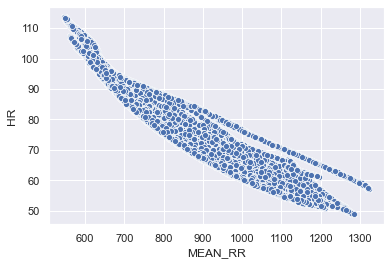

In [77]:
sns.scatterplot(x = X_train['MEAN_RR'], y = y_train)

In [104]:
model

ExtraTreesRegressor(n_jobs=-1, random_state=100)